#### Getting data

In [3]:
#!pip install pycaret
import pandas as pd
import numpy as np
from pycaret.datasets import get_data

df = get_data("iris")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Modeling

In [5]:
from pycaret.clustering import *

setup = setup(data = df,
            numeric_features= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
            ignore_features= ["species"],
            log_experiment = True,  # log the setup of the experiment on MLflow for Mlops
            experiment_name = "Clustering experiment",
            session_id = 123,
            silent=True,
            verbose=False
            )

In [7]:
kmeans = create_model("kmeans")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4978,529.3983,0.7806,0,0,0


In [9]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


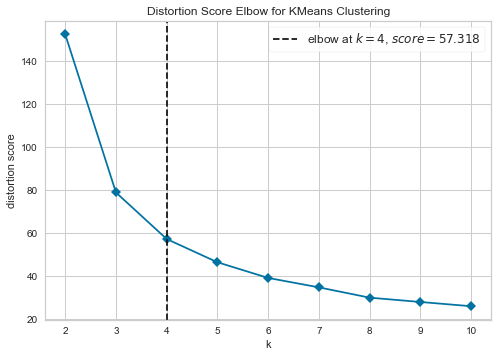

In [8]:
#We have to see the elbow plot to determine the number of clusters
plot_model(kmeans, plot="elbow")

In [10]:
#After looking at elbow plot, we can see that the best number of clusters is 4. Our kmeans model is using 4 clusters, other wise, we should re train the model with the best number of clusters.
kmeans = create_model("kmeans", algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=False)

#### Plotting

In [12]:
#Plotting 2d scatter plot with PCA method
plot_model(kmeans, plot="cluster")

In [11]:
#Plotting 3d scatter plot
plot_model(kmeans, plot="tsne")

In [15]:
plot_model(kmeans, plot="distribution")

#### Saving and predicting

In [14]:
#Saving the model for later use
save_model(kmeans, "../Models/kmeans");

Transformation Pipeline and Model Successfully Saved


In [19]:
#Loading the kmeans model
loaded_kmeans = load_model("../Models/kmeans")

#we assign the cluster predictions as labels to the dataframe
predictions = predict_model(loaded_kmeans, data = df)

#saving predictions as csv
predictions.to_csv("../DB/Output/Predictions.csv")

predictions.head()

Transformation Pipeline and Model Successfully Loaded


,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,Cluster 0
1,4.9,3.0,1.4,0.2,Iris-setosa,Cluster 0
2,4.7,3.2,1.3,0.2,Iris-setosa,Cluster 0
3,4.6,3.1,1.5,0.2,Iris-setosa,Cluster 0
4,5.0,3.6,1.4,0.2,Iris-setosa,Cluster 0
